In [32]:
# call the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [33]:
# EL Reclassification Data
df=pd.read_csv("filesreclass.csv", sep='\t')
df

,CDS,County,District,School,EL,FEP,Reclass
0,1.100170e+12,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,68.0,121.0,15
1,1.100170e+12,Alameda,Alameda County Office of Education,Community School for Creative Education,131.0,37.0,3
2,1.100170e+12,Alameda,Alameda County Office of Education,Yu Ming Charter,48.0,132.0,0
3,1.100170e+12,Alameda,Alameda County Office of Education,Urban Montessori Charter,63.0,18.0,2
4,1.100170e+12,Alameda,Alameda County Office of Education,Epic Charter,0.0,0.0,1
...,...,...,...,...,...,...,...
10189,5.872752e+13,Yuba,Wheatland,Wheatland Elementary,24.0,5.0,4
10190,5.872752e+13,Yuba,Wheatland,Wheatland Charter Academy,0.0,2.0,0
10191,5.872769e+13,Yuba,Wheatland Union High,Edward P. Duplex,6.0,6.0,0
10192,5.872770e+13,Yuba,Wheatland Union High,Wheatland Union High,30.0,112.0,0


In [53]:
k_means_data = df.loc[:, 'CDS':'Reclass'].head()
k_means_data
k_means_data.fillna(method='bfill', axis=0).fillna(0)

C:\Users\Parsec\AppData\Local\Temp\ipykernel_24340\424867643.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  k_means_data.fillna(method='bfill', axis=0).fillna(0)


,CDS,County,District,School,EL,FEP,Reclass
0,0,0,5,2450,68,121,15
1,1,0,5,1630,131,37,3
2,2,0,5,8574,48,132,0
3,3,0,5,7881,63,18,2
4,4,0,5,2451,0,0,1


In [35]:
# Converting objects'String Values' into integers
label_encoders = {}
columns_to_encode = ['CDS', 'County', 'District', 'School', 'EL', 'FEP', 'Reclass']

for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [36]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,CDS,County,District,School,EL,FEP,Reclass
0,0,0,5,2450,68,121,15
1,1,0,5,1630,131,37,3
2,2,0,5,8574,48,132,0
3,3,0,5,7881,63,18,2
4,4,0,5,2451,0,0,1


Text(0, 0.5, 'EL')

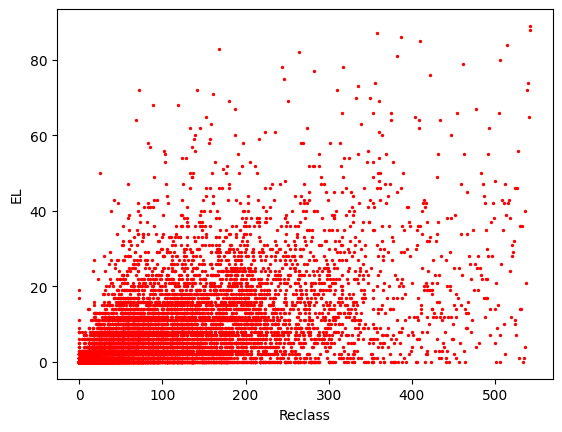

In [60]:
#scatter plot
plt.scatter(df['EL'],df['Reclass'], c='red', s=2)
plt.xlabel("Reclass")
plt.ylabel("EL")

In [61]:
import numpy as np
from sklearn.cluster import KMeans

# Check for NaN values in the DataFrame
nan_indices = df.isna().any(axis=1)

# Remove rows with NaN values from the DataFrame
df_clean = df[~nan_indices]

# Extract the relevant columns and convert to a NumPy array
X = np.array(list(zip(df_clean['EL'], df_clean['Reclass'])))

# Define the number of clusters (k)
k = 3

# Create and fit the KMeans model
model = KMeans(n_clusters=k)
kmeans = model.fit(X)

# Get the labels and centroids
labels = model.predict(X)
centroids = model.cluster_centers_

print(f'The labels are :{labels}')
print(f'The Centroids are:{centroids}')


The labels are :[2 0 2 ... 2 2 1]
The Centroids are:[[156.49599744  11.46942043]
 [339.75295276  20.29724409]
 [ 35.69017341   3.76135425]]


C:\Users\Parsec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'EL')

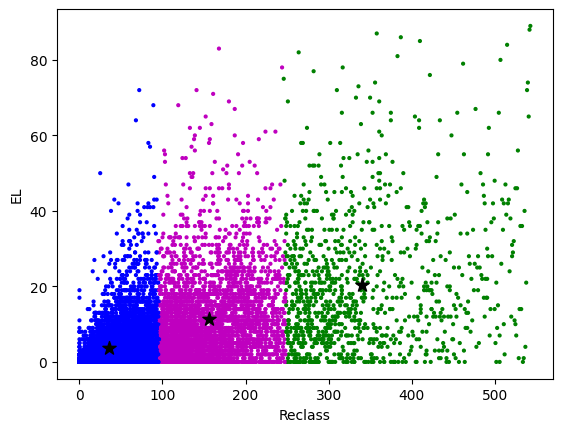

In [63]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['EL'], df['Reclass'], c=colors, s=4)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')
plt.xlabel("Reclass")
plt.ylabel("EL")